### Divar Dataset Analysis

Divar is the main reference for free requirements and the sale and purchase of new and second-hand goods. Dataset of divar is consists of goods that people post them for sale. Each item has some information like type, category, price ... and each post has information such as city, platform ... . 

As we know, visualization is one of the most important steps in data analysis. In this project, we intend to obtain some information about data by visualizing data with different features. For this purpose, by considering the features separately or together, as well as grouping the data based on some features, we obtained information. Including:

- Cities with the most ads
- The most advertised brands
- The most expensive category of goods
- The most advertised brands in each city
- The most expensive brand in each category



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

In [2]:
divar = pd.read_csv("Cleaned Divar.csv" , index_col= 0)
divar.shape

(945877, 15)

In [3]:
divar.columns

Index(['archive_by_user', 'cat1', 'cat2', 'cat3', 'city', 'created_at',
       'image_count', 'mileage', 'platform', 'price', 'title', 'type', 'year',
       'brand_fa', 'brand_en'],
      dtype='object')

### def draw plot

To draw each plot, we define a function with default values. we Use these functions if we need to draw any plot. On the other hand, all the diagrams used use the same template and have a similar appearance.

In [4]:
#Draw bar plot from value_count object
def draw_barh(value , xlabel , ylabel , xmaximum):
    
    if len(value) < 10 :        #Set appropriate size of figure based on axes size
        fig, ax = plt.subplots(figsize = (7,7))
    else:
        fig, ax = plt.subplots(figsize = (10,10))
    
    value.plot.barh()         #Horizontal bar plot
    plt.xlabel(xlabel , fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12 )
    plt.xlim(xmax=xmaximum)

    #Add bar sizes to bar charts
    y = value.values

    for i, v in enumerate(y):
        plt.text(v + (0.02*v), i , str(v) , verticalalignment='center')

    # Remove the top, right spines (figure borders)
    # which really aren't necessary for a bar chart.
    # Also, make the bottom and left spine gray instead of black.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDDDDD')
    ax.spines['bottom'].set_color('#DDDDDD')
    
    # Add a horizontal and vertical grid.
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')


In [5]:
#Draw bar plot from x and y as list

def draw_barh_plot(x,y,xlabel,ylabel):
    
    if (len(y) < 20) :           #Set appropriate size of figure based on axes size
        fig, ax = plt.subplots(figsize = (7,7))
    else:
        fig, ax = plt.subplots(figsize = (9,9))
    
    
    #Get normalize function
    my_color = cm.inferno(np.linspace(0.7 , 0.9 , len(y)))
    
    plt.barh(x , y , color = my_color , height = 0.3 )
    plt.xlabel(xlabel , fontsize = 12)
    plt.ylabel(ylabel , fontsize = 12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')

    #Remove the ticks as well.
    ax.tick_params(bottom=False, left=False)

    # Add a horizontal and vertical grid.
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')
    

    plt.show()

##### City comparison

To see people of what city more use this app to sell their goods, we draw a bar chart and see that 'Tehran' has most and 'Kermanshah' has the least Ads in this app.

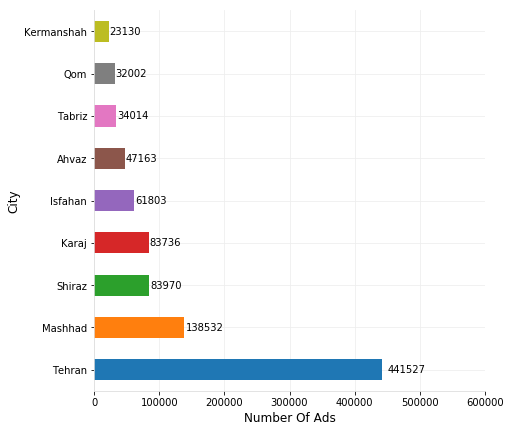

In [47]:
city_count = pd.value_counts(divar['city'] , sort = True)

xlabel = 'Number Of Ads' 
ylabel = 'City'
xmax=600000

draw_barh(city_count , xlabel , ylabel , xmax)

#### Platform 

For comparison that users are utilize which platform, we can use bar chart. For this purpose, we consider the y axis for the platform and the x axis for the number of users. As we can see majority of users prefer to use Mobile app.

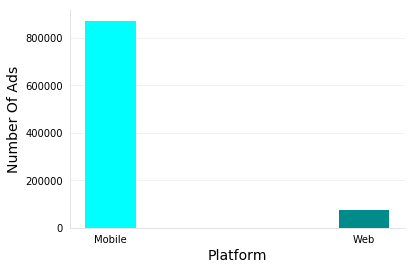

In [95]:
fig, ax = plt.subplots()

platform_dict = {}

#Saving platform frequently as dictionary
for item in divar['platform']:  
    if item in platform_dict:
        platform_dict[item] += 1
    else:
        platform_dict[item] = 1

#Plot two bars in one fig
plt.bar('Mobile' , platform_dict[0] , color = 'aqua' , width = 0.2)
plt.bar('Web' , platform_dict[1] , color = 'darkcyan' , width = 0.2)
plt.xlabel('Platform' , fontsize = 12)
plt.ylabel('Number Of Ads' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

#Remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Add a horizontal and vertical grid.
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


#### Mileage


Mileage is one of characteristic of vehicle goods. To check if most of the car ads are related to used cars or new cars, we draw diagrams according to mileage. As we can see, most of the vehicles had a low mileage. It can be understood that most of the ads are related to new cars. Or that most of the ads are related to less used cars and are specific to recent years. To investigate this issue, we can plot the number of ads according to the year of production of vehicles.

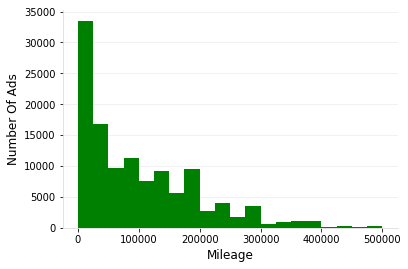

In [3]:
fig, ax = plt.subplots()

mileage = divar[divar['mileage'] > 0]['mileage']  #Extranct vehicle rows

#Plot histogram
plt.hist(mileage , bins=20 , color='green')
plt.xlabel('Mileage' , fontsize = 12)
plt.ylabel('Number Of Ads' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#### Price & Mileage

It seems that price of vehicles have relatonship with mileage of them. To see the relationship between these two columns, we drew the following diagram. As we can see, there is an inverse relationship between these two variables, and the lower the mileage, the higher the price of the vehicle. The existence of such a relationship seems logical because the lower the mileage of the vehicle, the newer and healthier it is.

(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08,  4.0e+08,  4.5e+08]),
 <a list of 11 Text xticklabel objects>)

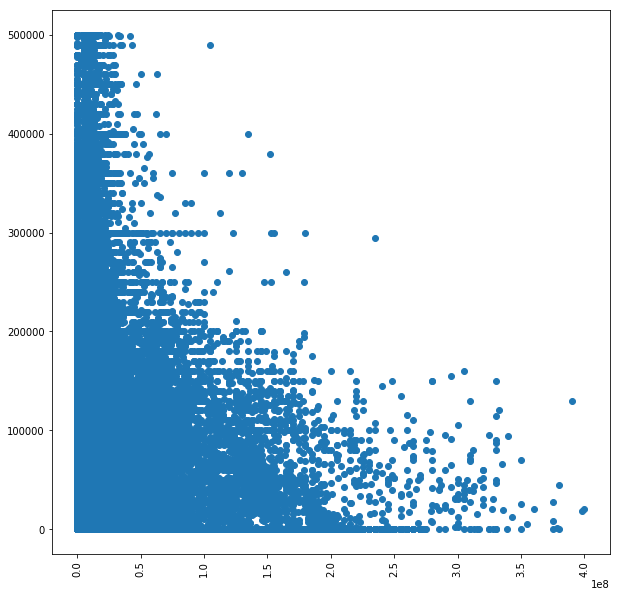

In [6]:
plt.figure(figsize=(10,10))

#Scatter Plot 
plt.scatter(divar['price'] , divar['mileage'])

#### Year

One of the features in the database is the year. This feature is for vehicle goods. To check if the existing ads are more for old or new cars, we show the number of ads in terms of the year of manufacture of the cars in the chart. As we can see in the diagram, the old cars are less advertised. Most of the ads are related to the vehicle of 1393.

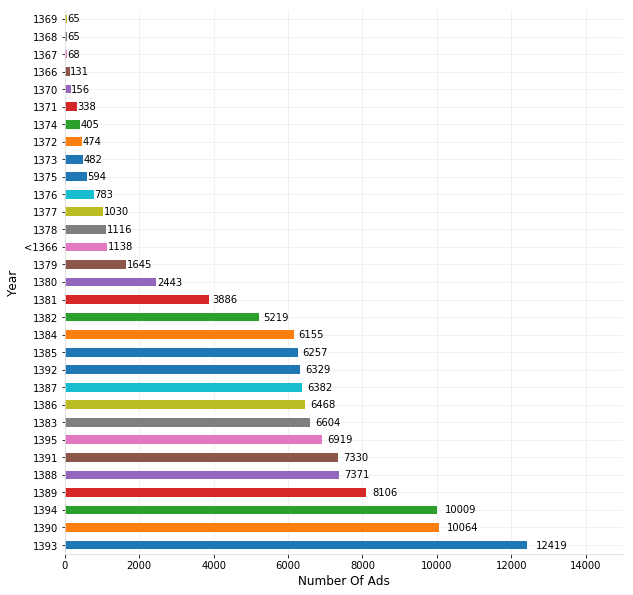

In [6]:
#extract vehicle rows
year_count = pd.value_counts(divar[divar['year'] != 'Not Vehicle']['year'] , sort = True)

xlabel = 'Number Of Ads'
ylabel = 'Year'
xmax = 15000

draw_barh(year_count , xlabel , ylabel , xmax)

#### Type

In the type column, it is specified which gender is suitable for the product that is put up for sale. As we can see, the goods are divided into 5 categories: women, men, girls, boys, and general. Looking at the bar chart, it can be seen that general goods had the most ads in this app.

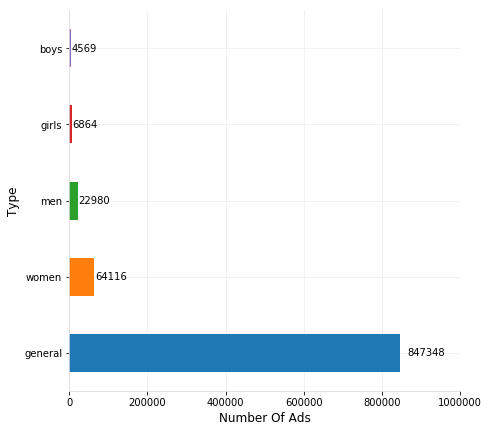

In [48]:
#Value counts for type column
type_counts = pd.value_counts(divar['type'] , sort = True)

xlabel = 'Number Of Ads' 
ylabel = 'Type'
xmax=1000000

draw_barh(type_counts , xlabel , ylabel , xmax)

#### Cat1

In this part, we will examine the cat1 column. First we want to see "How many categories are the goods divided into?". We can also see which category has the most ads. As we can see, the goods are classified into 6 groups. Most of the ads are related to for-the-home goods.

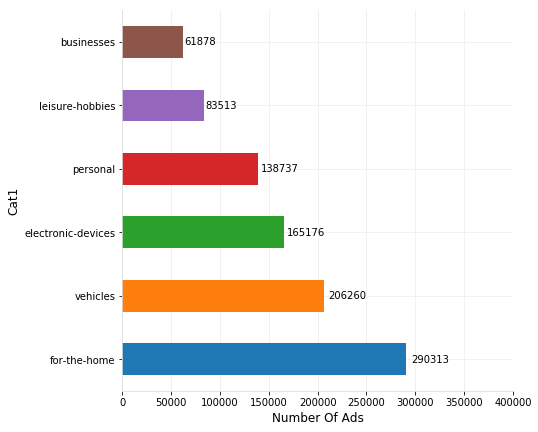

In [7]:
#Value count for cat1 column
cat1_counts = pd.value_counts(divar['cat1'] , sort = True)

xlabel = 'Number Of Ads'
ylabel = 'Cat1'
xmax = 400000

draw_barh(cat1_counts , xlabel , ylabel , xmax)


#### Brand

The goods in this dataset have a brand. By examining the amount of ads available by brand in the chart, the most advertised brands can be identified. As we can see, since these brands are related to goods with different types, it is better to chart each type separately and compare the brands. By doing this, we can identify the best-selling brands of each type.

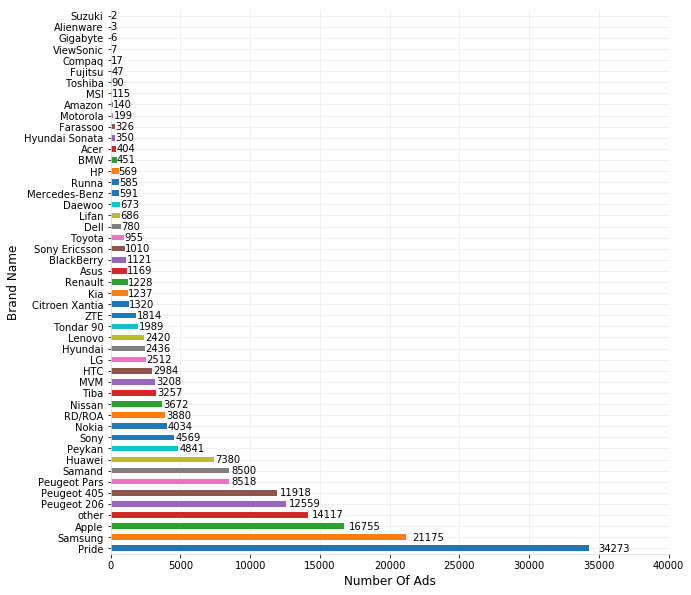

In [8]:
#value count for known brands
brand_en_count = pd.value_counts(divar[divar['brand_en'] != 'UNKNOWN']['brand_en'] , sort = True)

xlabel = 'Number Of Ads' 
ylabel = 'Brand Name'
xmax=40000

draw_barh(brand_en_count , xlabel , ylabel , xmax)

#### Price and Category

We want to know what category of goods have more price. So we plot with category and price column. as we see vehicle prices have more price than other categories. Also we find that personal goods have least price.

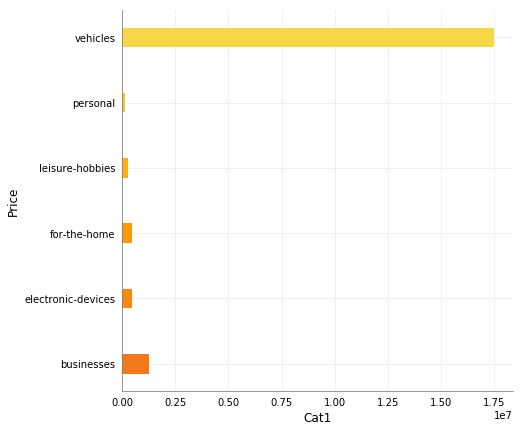

In [66]:
#extracting rows that have logical price
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1)]

#groupby rows by cat1 and save mean of price for each group
range_of_price_in_cat1 = remove_min_price.groupby('cat1')['price'].agg(['mean'])

#define x and y axes
x = range_of_price_in_cat1.index
y = range_of_price_in_cat1.values.reshape(-1)
xlabel = 'Cat1'
ylabel = 'Price'

draw_barh_plot(x , y , xlabel , ylabel )

#### Mean Price For Each Category

In this part we plot price for each cat1 and its cat2. in this situation we can compaire price of each goods in each category. for instance in vehicle category car items has maximum price. By see plots we can analysis other categories.

In [72]:
#Show all outputs

%%javascript
IPython.OutputArea.auto_scroll_threshold = 999

<IPython.core.display.Javascript object>

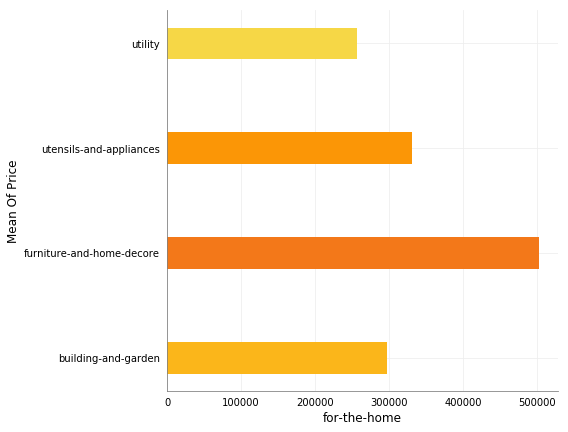

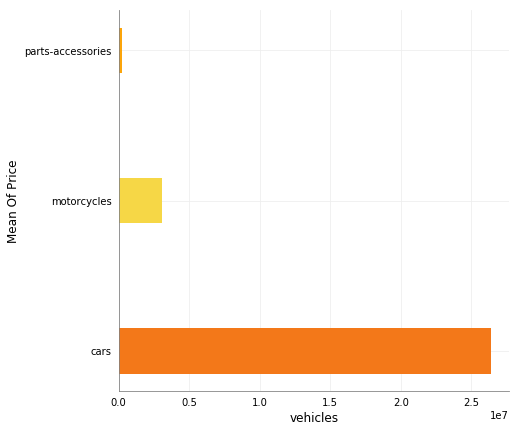

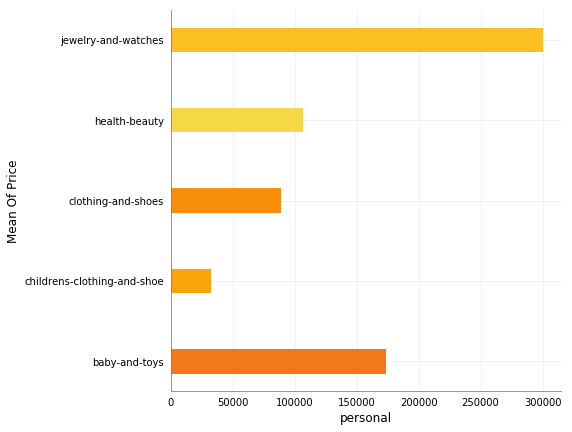

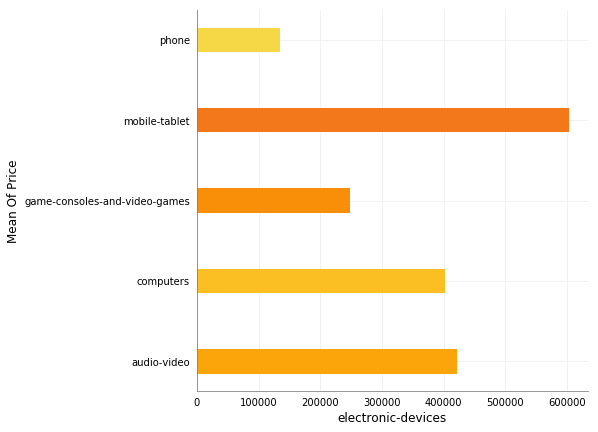

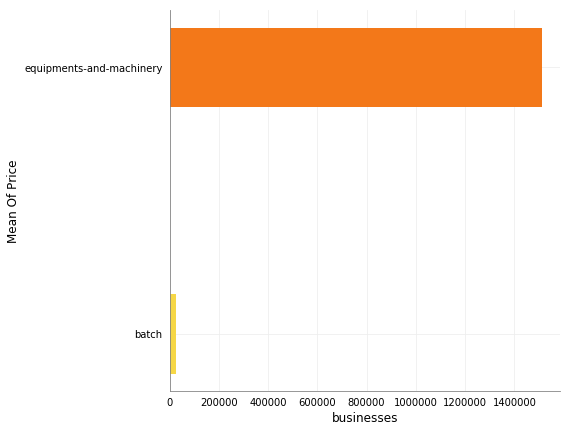

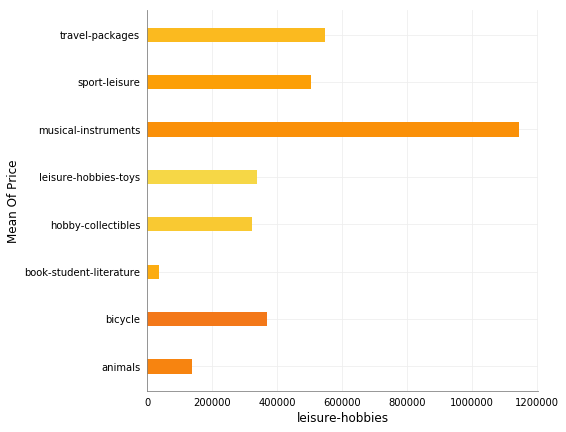

In [91]:
#groupby cat1 and cat2
range_of_price_in_cat2 = remove_min_price.groupby(['cat1' , 'cat2'])['price']

for cat1 in divar['cat1'].unique():
    x = []
    y = []
    xlabel = cat1
    for cat2 in divar['cat2'].unique():
        if (cat1 , cat2) in range_of_price_in_cat2.groups.keys():
            x.append(cat2)
            y.append(range_of_price_in_cat2.get_group((cat1, cat2)).mean()) #obtain mean of price for each cat2 group
    
    draw_barh_plot(x,y,xlabel,'Mean Of Price') #plot for each category in cat1 seperately
    

{'boxes': [<matplotlib.lines.Line2D at 0x1776f69d7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1776f6a8208>,
 'fliers': [<matplotlib.lines.Line2D at 0x1776f6a8e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1776f6a8a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1776f69d908>,
  <matplotlib.lines.Line2D at 0x1776f69dda0>]}

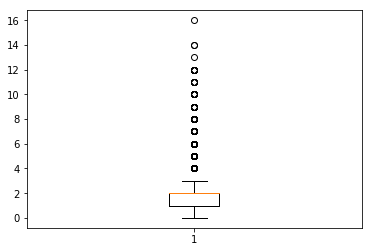

In [81]:
plt.boxplot(divar['image_count'])

#### Brand And Category

Now we want to check for each category what brands has more ads. Looking at the charts, we find that Samsung and Apple have the highest average ads in the category of electronics. In the category of vehicles, Pride has the highest average ads.

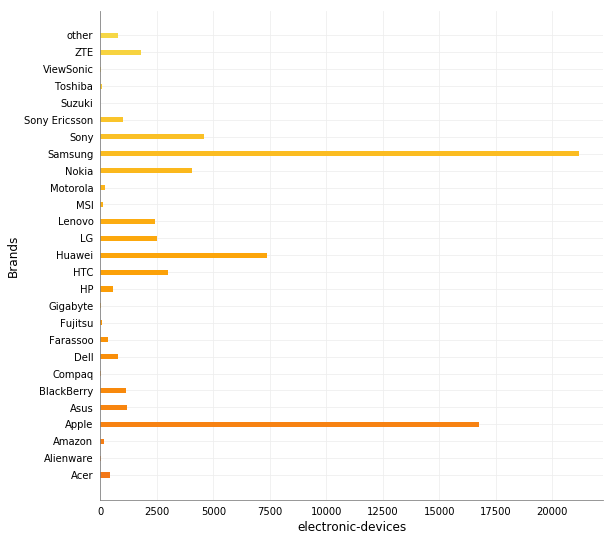

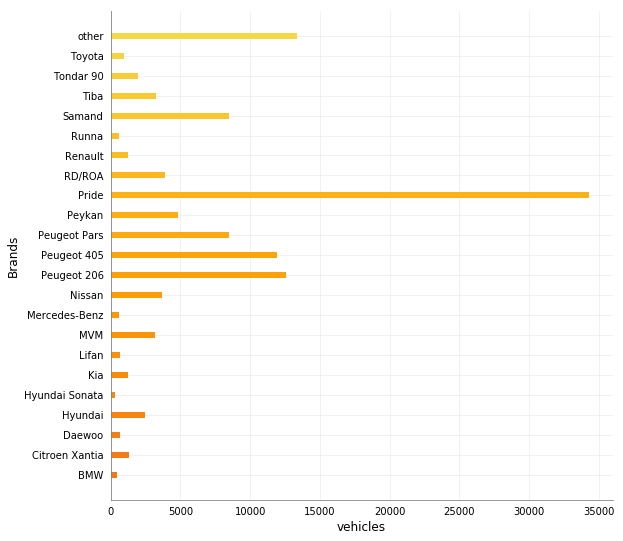

In [92]:
#obtain pivot table for number of each brand in category
cat_brand = divar.pivot_table(index = 'brand_en' ,columns = 'cat1'  , aggfunc = 'size') 
cat_brand.fillna(0 , inplace=True)

for cat1 in cat_brand.columns:
    x = []
    y = []
    xlabel = cat1
    for brand in cat_brand.index:
        if (cat_brand.loc[brand , cat1] != 0) and (brand != 'UNKNOWN'):
            x.append(brand)
            y.append(cat_brand.loc[brand , cat1]) #number of ads for each brand
    if x != [] :
        draw_barh_plot(x,y,xlabel,'Brands') #plot for each category in cat1 seperately

#### Brand and City

In this figure we want to check which brands are more sold in each city. All cities except Tehran and Shiraz have the most ads for Pride and Samsung brands. In Tehran, the most ads for Pride and Apple and Shiraz are the most ads for Pride and other goods.

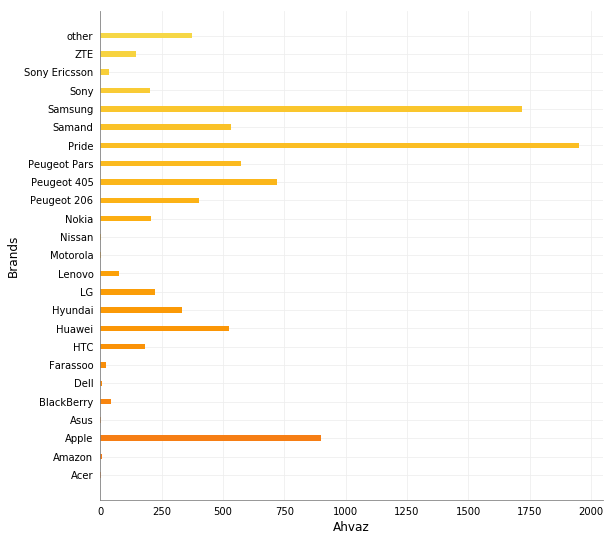

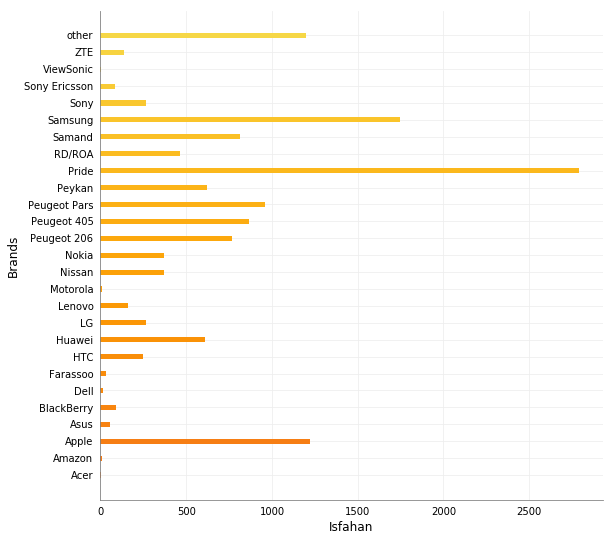

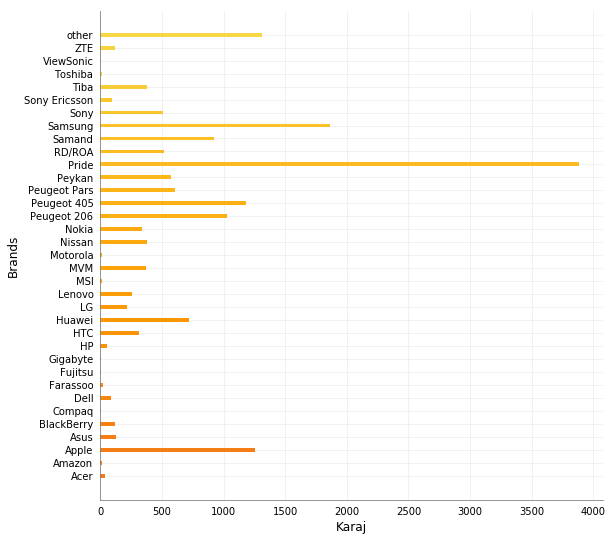

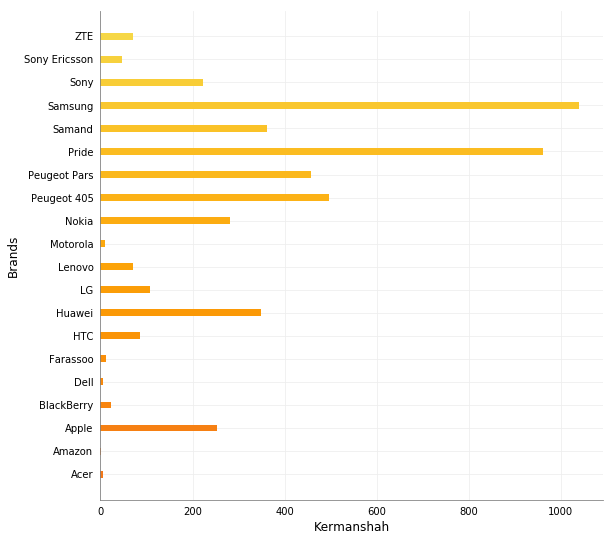

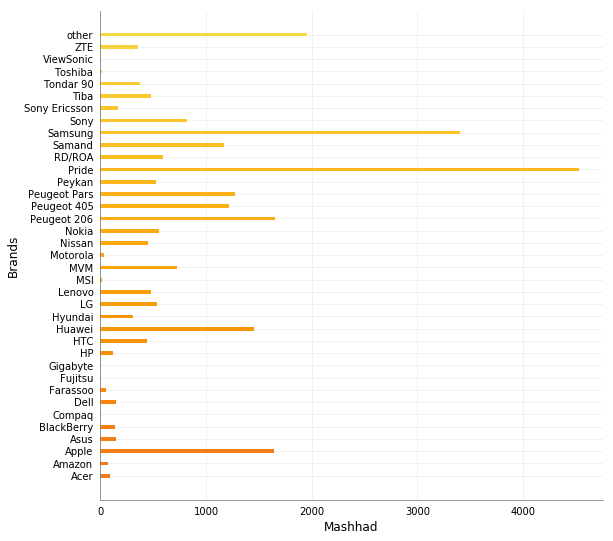

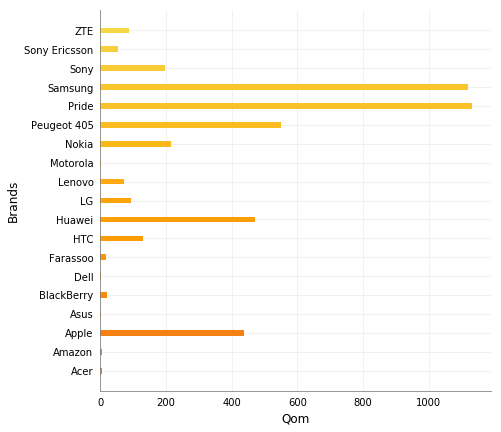

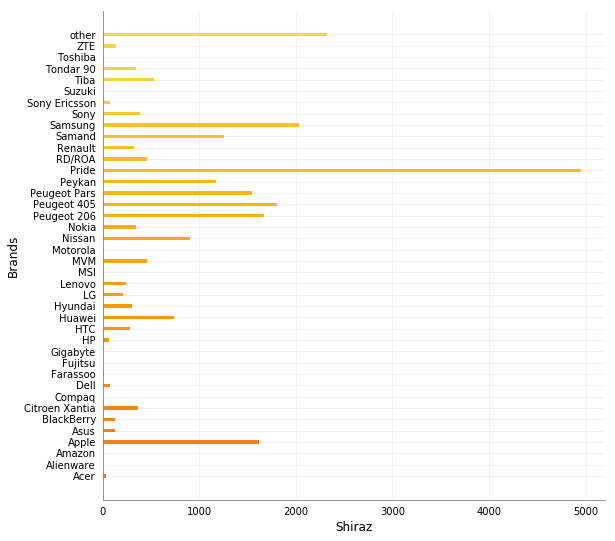

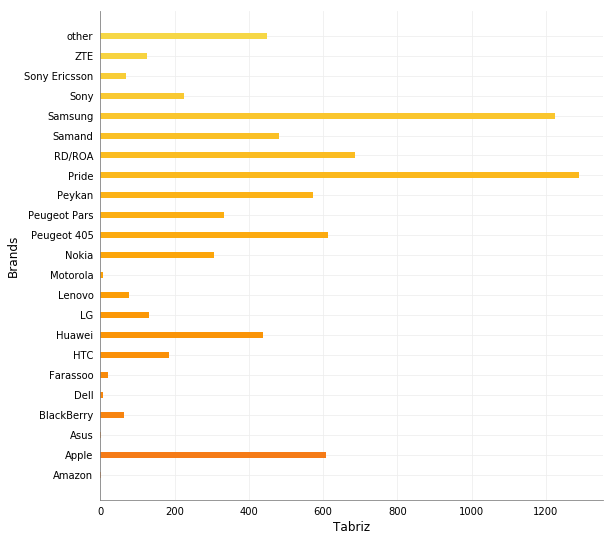

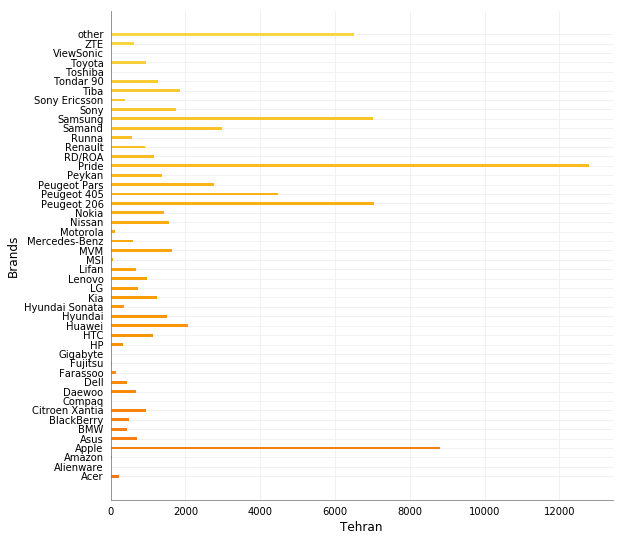

In [93]:
#obtain pivot table for number of each brand in category
city_brand = divar.pivot_table(index = 'brand_en' ,columns = 'city'  , aggfunc = 'size') 
city_brand.fillna(0 , inplace=True)

for city in city_brand.columns:
    x = []
    y = []
    xlabel = city
    for brand in city_brand.index:
        if (city_brand.loc[brand , city] != 0) and (brand != 'UNKNOWN'):
            x.append(brand)
            y.append(city_brand.loc[brand , city])   #number of brands that ads in city
    if x != [] :
        draw_barh_plot(x,y,xlabel,'Brands') #plot for each city seperately

#### Image Count Of Each Type

In this part we want to check that what type of goods upload more image for their ads. As we can see in the figure, people have uploaded more photos for public goods.

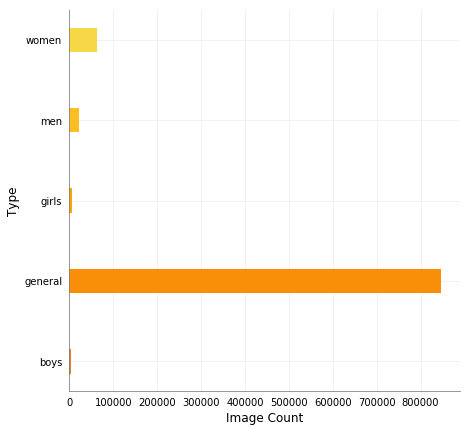

In [94]:
#obtain pivot table for number of image_count for each type
img_typ = divar.pivot_table(index = 'type' ,columns = 'image_count'  , aggfunc = 'size') 

#fill null values
img_typ.fillna(0 , inplace=True)

#calculate cum of image counts
img_typ['sum'] = img_typ.sum(axis = 1)

#define x and y axes
x = img_typ.index
y = img_typ.loc[:,'sum']
xlabel = 'Image Count'
ylabel = 'Type'

draw_barh_plot(x,y,xlabel,ylabel)

#### City and Platform

To compare whether people use the web version more or mobile, we use the chart below. We also draw both graphs together to see which cities have the most people using each of the platforms. As we can see, in most cities, most people use the mobile version. We also see that in both versions, the people of Tehran and then Mashhad have the most users.

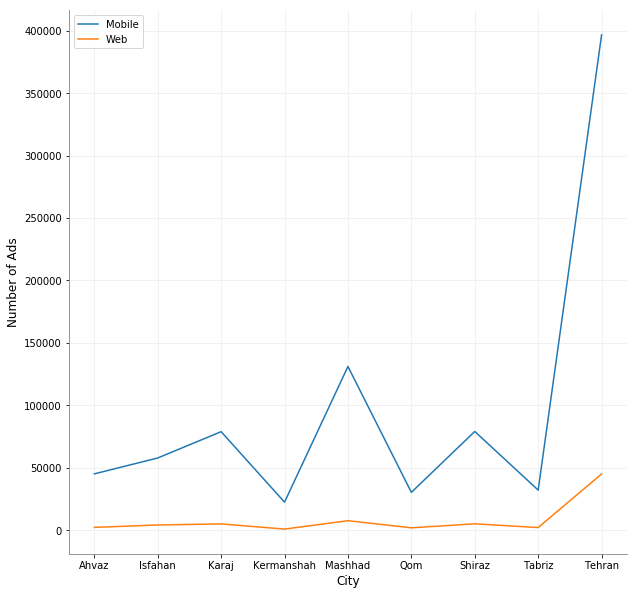

In [10]:
#obtain pivot table for number of platform user for each city
city_pltfrm = divar.pivot_table(index = 'city' ,columns = 'platform'  , aggfunc = 'size') 

city_pltfrm_dict = {}
for platform in city_pltfrm.columns:
    x = []
    y = []
    xlabel = platform
    for city in city_pltfrm.index:
        x.append(city)
        y.append(city_pltfrm.loc[city , platform])
    city_pltfrm_dict[xlabel] = y

fig, ax = plt.subplots(figsize = (10,10))
    
plt.plot(city_pltfrm.index , city_pltfrm_dict[0] , label = 'Mobile')
plt.plot(city_pltfrm.index , city_pltfrm_dict[1] , label = 'Web')

plt.xlabel('City' , fontsize = 12)
plt.ylabel('Number of Ads' , fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# Add a horizontal and vertical grid.
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True, color='#EEEEEE')

plt.legend()

#### Cat1 And City

 In this part we want to analyse each cat1 in citys.  As we see in Tabriz for the home  and busunesses category are sell  greater than other citys. Other categories are more advertised in Tehran.

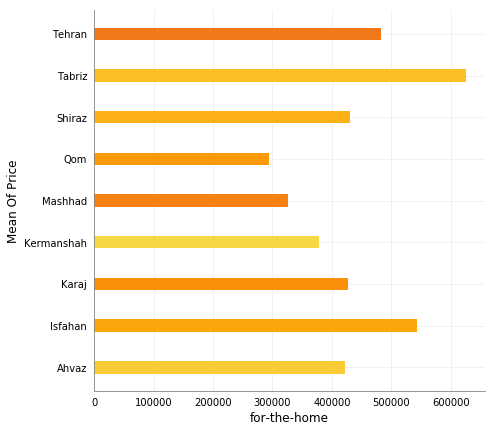

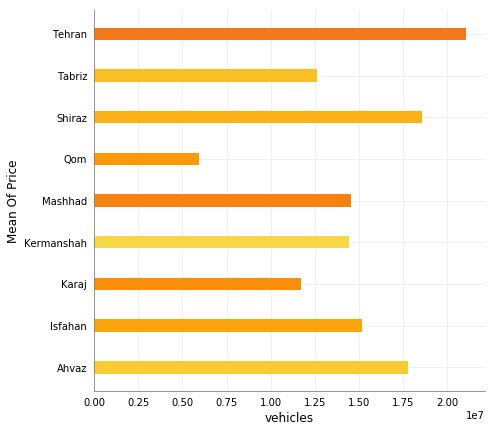

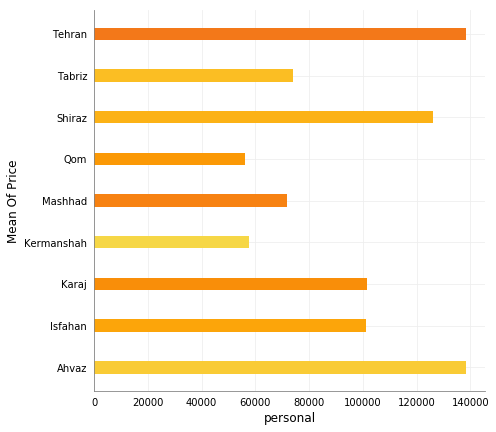

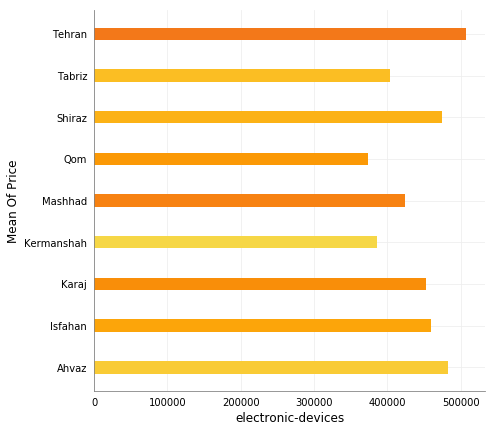

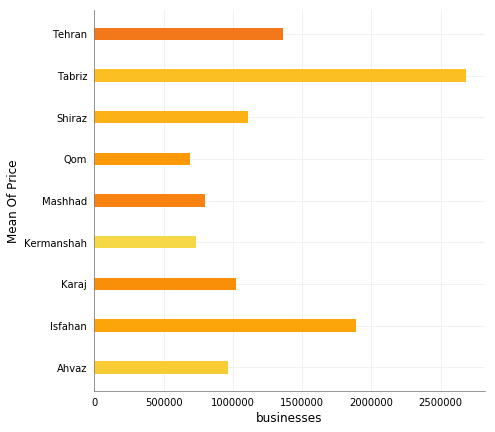

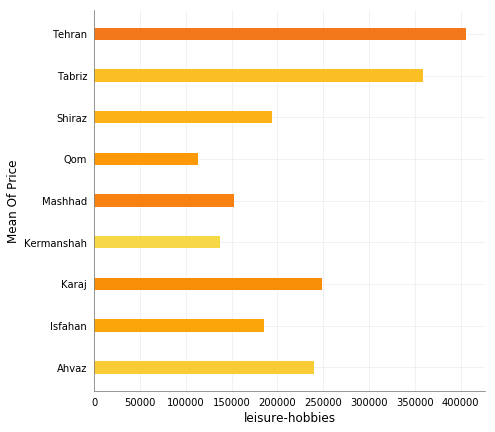

In [95]:
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1)]

price_of_city = remove_min_price.groupby(['cat1' , 'city'])['price']
price_of_city

for cat1 in divar['cat1'].unique():
    x = []
    y = []
    xlabel = cat1
    for city in divar['city'].unique():
        if (cat1 , city) in price_of_city.groups.keys():
            x.append(city)
            y.append(price_of_city.get_group((cat1, city)).mean())
    draw_barh_plot(x,y,xlabel,'Mean Of Price')

#### City And Cat1

The cities of Shiraz and Tabriz have the most advertisements related to vehicles. Other cities have the highest number of ads are related to for-the-home category.

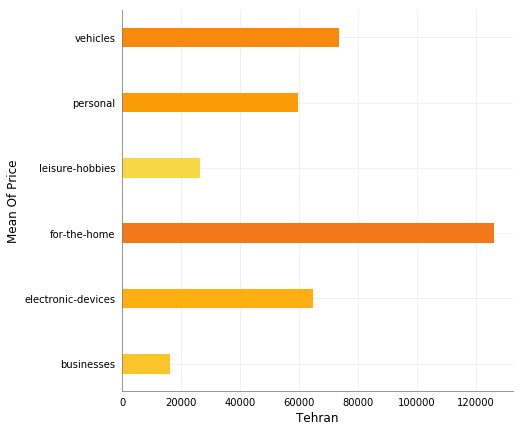

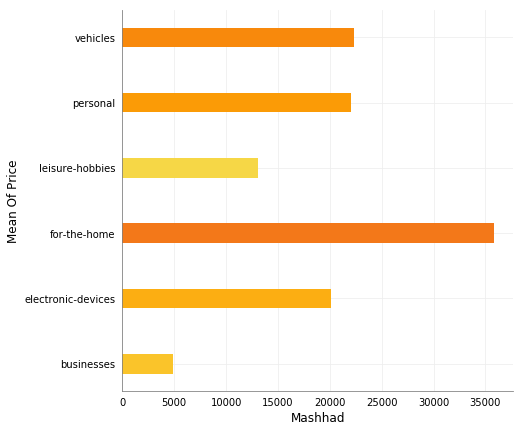

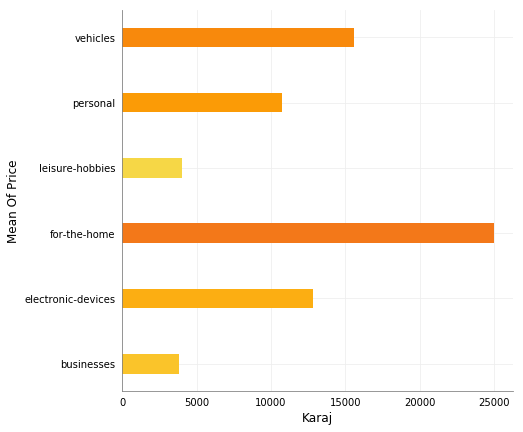

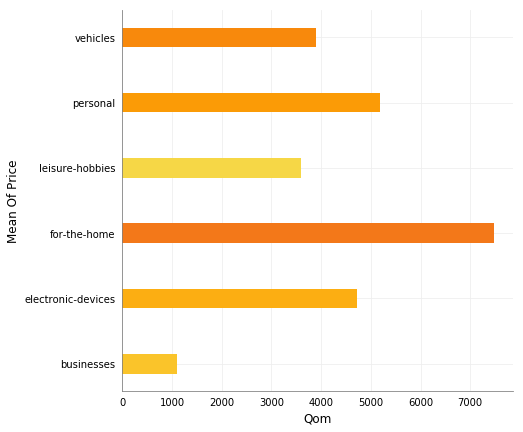

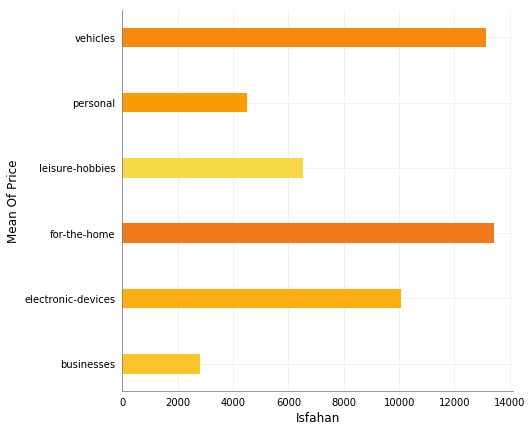

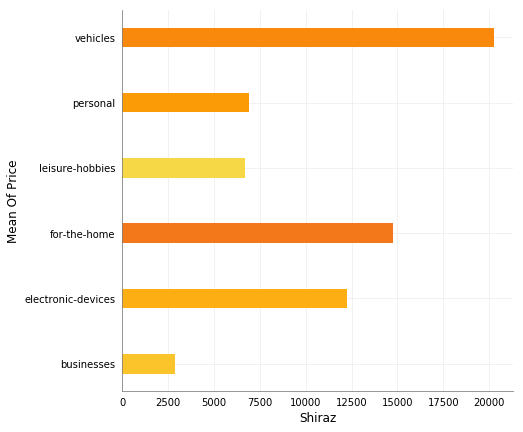

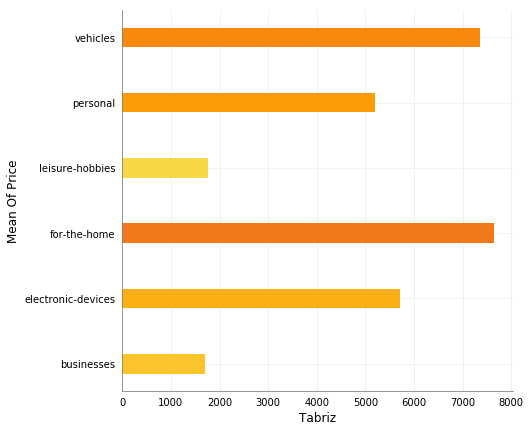

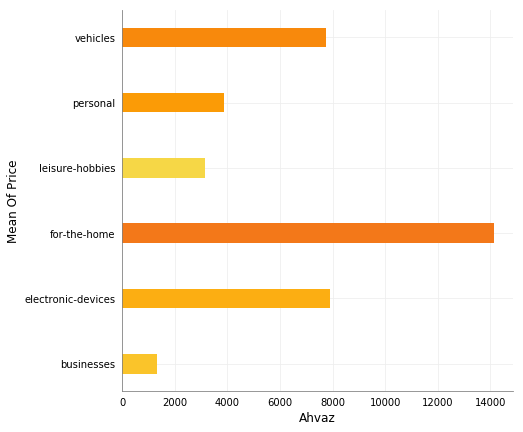

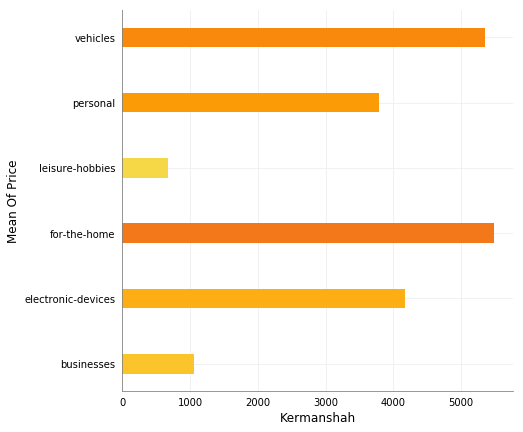

In [96]:
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1)]

price_of_city = remove_min_price.groupby(['city', 'cat1'])['price']

for city in divar['city'].unique():
    x = []
    y = []
    xlabel = city
    for cat1 in divar['cat1'].unique():
        if (city , cat1) in price_of_city.groups.keys():
            x.append(cat1)
            y.append(price_of_city.get_group((city, cat1)).count())
    draw_barh_plot(x,y,xlabel,'Mean Of Price')

#### Price And Type

To compare the average price of different types of goods, we draw a graph of the average price in terms of types of goods. As we see the average price of public goods is higher than other goods. According to the reviews done in the previous sections, this high price is probably related to vehicles. To test this theory, we draw a diagram after removing the vehicles.

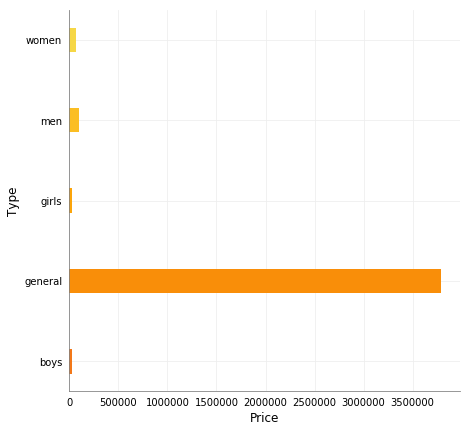

In [11]:
#obtain pivot table for mean price of each type
type_price = divar.pivot_table(index = 'type' ,values = 'price'  , aggfunc = 'mean') 

#define x and y axes
x = type_price.index
y = type_price.values.reshape(-1)
xlabel = 'Price'
ylabel = 'Type'

draw_barh_plot(x,y,xlabel,ylabel)

With the elimination of vehicles, the ratio of other items increased, but the general type still has the highest average price.

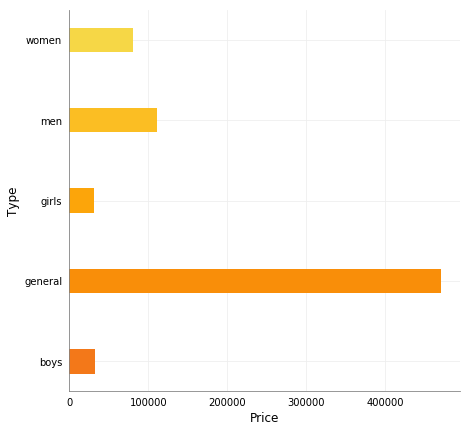

In [98]:
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1) & (divar['cat1'] != 'vehicles')]
type_price = remove_min_price.pivot_table(index = 'type' ,values = 'price'  , aggfunc = 'mean') 

x = type_price.index
y = type_price.values.reshape(-1)
xlabel = 'Price'
ylabel = 'Type'

draw_barh_plot(x,y,xlabel,ylabel)

#### Cat1 and Brand 

In this section, we want to see which brand has the highest price from each group and category of goods. As we can see, in the group of vehicles  the highest price belonging to BMW, and in electronic vehicles, the highest price belongs to the alienware brand.


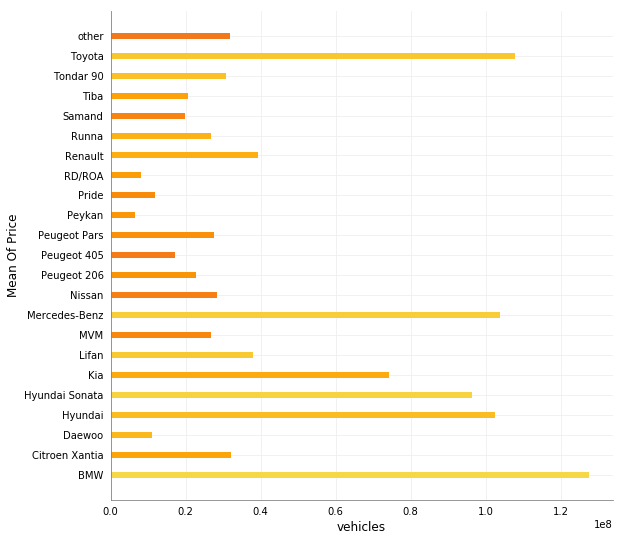

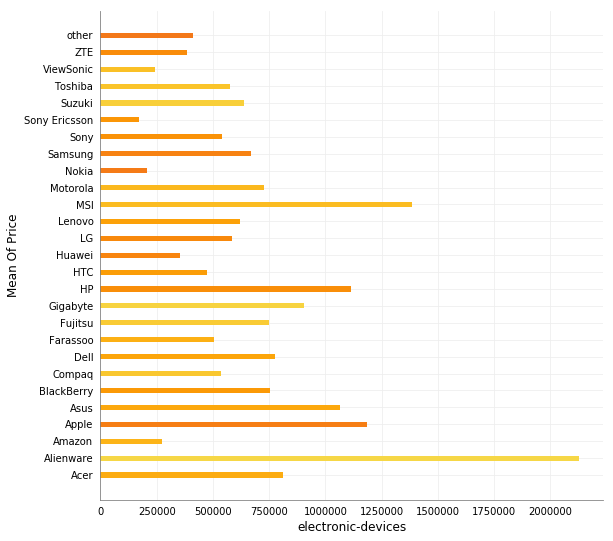

In [99]:
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1) & (divar['brand_en'] != 'UNKNOWN')]
cat_of_brand = remove_min_price.groupby(['cat1' , 'brand_en'])['price']

for cat1 in divar['cat1'].unique():
    x = []
    y = []
    xlabel = cat1
    for brand in divar['brand_en'].unique():
        if (cat1 , brand) in cat_of_brand.groups.keys():
            x.append(brand)
            y.append(cat_of_brand.get_group((cat1, brand)).mean())
    if x != [] :
        draw_barh_plot(x,y,xlabel,'Mean Of Price')  #draw bar plot for each category 

####  

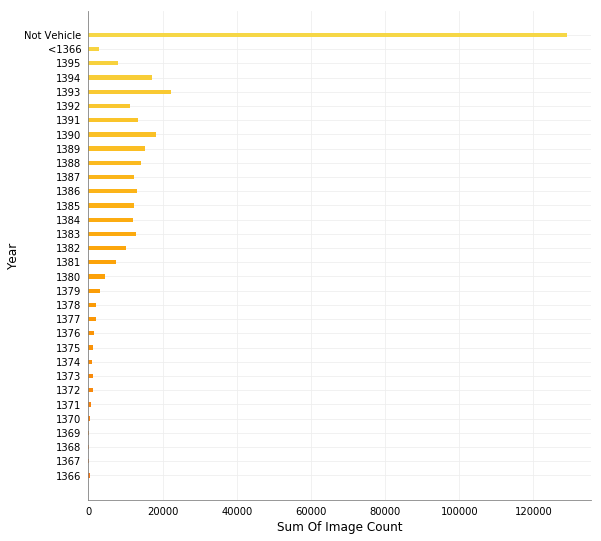

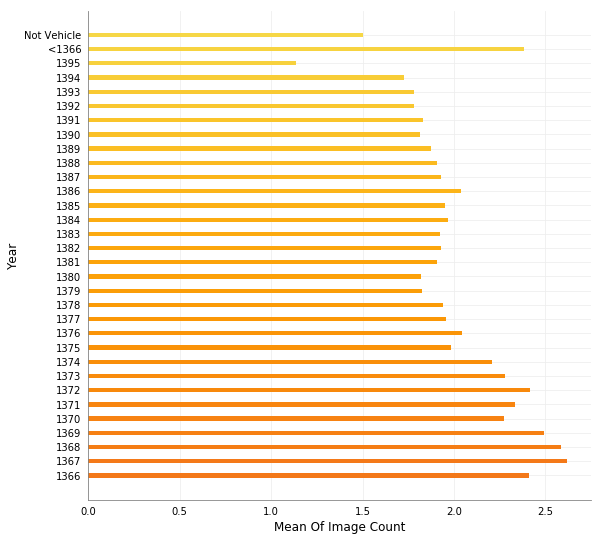

In [101]:
vehicles = divar[divar['cat1'] == 'vehicles']
year_img = vehicles.groupby('year')['image_count'].agg(['sum' , 'mean'])

x = year_img.index
y = year_img.values[:,0]
y2 = year_img.values[:,1]

xlabel = 'Sum Of Image Count'
ylabel = 'Year'
xlabel2 = 'Mean Of Image Count'

draw_barh_plot(x , y , xlabel , ylabel)
draw_barh_plot(x , y2 , xlabel2 , ylabel)


#  Repair This 

In [ ]:
year_less_than_75 = []
year_between_75_and_85 = []
year_greater_than_85 = []
for year in mileage_and_year.index.levels[0]:
    if year != '<1366' and year != 'Not Vehicle':
        year = int(year)
        if year < 1375:
            year_less_than_75.append(year)
        elif 1375 <= year < 1385 :
            year_between_75_and_85.append(year)
        else:
            year_greater_than_85.append(year)

year_less_than_75

In [222]:
remove_min_price = divar[(divar['price'] > 10) & (divar['price'] != -1) & (divar['year'] != 'Not Vehicle')]
mileage_and_year = remove_min_price.groupby(['year' , 'mileage'])['price']

# for year in divar['year'].unique():
#     x = []
#     y = []
#     xlabel = year
#     for mileage in divar['mileage'].unique():
#         if (year , mileage) in mileage_and_year.groups.keys():
#             x.append(mileage)
#             y.append(mileage_and_year.get_group((year, mileage)).mean())
#     draw_barh_plot(x,y,xlabel,'Mean Of Price')